In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
# import tensorflow as tf
# tf.__version__
# tf.test.is_built_with_cuda()
# tf.test.is_gpu_available()

In [38]:
! pip install matplotlib

  Using cached matplotlib-3.3.3-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)


In [3]:
model = ResNet50(weights='imagenet', include_top=True)

In [10]:
# model_path = "resnet50_weights_tf_dim_ordering_tf_kernels.h5"
# model = keras.models.load_model(model_path)

In [92]:
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0) # make it 4D
    x = preprocess_input(x)
    return img,x

def process_arr(array):
    plt.imshow(array); plt.show()
    x = np.expand_dims(array,axis=0) # make it 4D
    x = preprocess_input(x)
    return img,x

In [4]:
import os

In [16]:
folder = 'images'
files = os.listdir(folder)
for i,file in enumerate(files):
    print(i,file)

0 bike.jpg
1 biker-gang.jpg
2 cat.png
3 elephant.jpg
4 example.jpg
5 horse.png
6 horse_query.png
7 musk.jpg
8 party.png


images\elephant.jpg


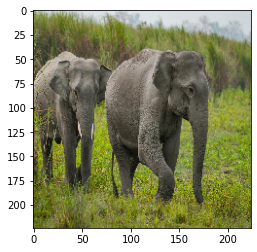

101


[[('n01871265', 'tusker', 0.5438292),
  ('n02504458', 'African_elephant', 0.2928017),
  ('n02504013', 'Indian_elephant', 0.16282591)]]

In [45]:
img_path = os.path.join(folder,files[3]); print(img_path)
img, processed_image = load_image(img_path)
plt.imshow(img)
plt.show()
preds = model.predict(processed_image); print(np.argmax(preds))
decode_predictions(preds,top=3)

In [49]:
# okay so the whole image is 224x224
# 112 is the half - can split the whole image into 
# 4 parts and see where the hathi is maximum

In [48]:
224/2

112.0

In [53]:
img_arr = np.array(img)

In [54]:
img_arr.shape

(224, 224, 3)

In [55]:
import cv2

In [125]:
cv2.imshow('test',img_arr)
cv2.waitKey(0)
cv2.destroyAllWindows()

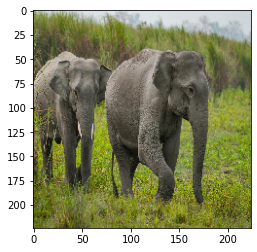

In [61]:
plt.imshow(img_arr)

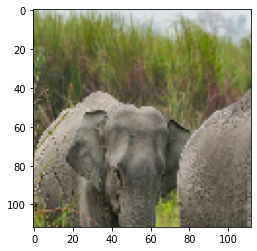

In [63]:
img_half = img_arr[:112,:112]
plt.imshow(img_half)

In [ ]:
0,112 0,112
0,112 112,224
112,224 0,112
112,224 112,224

0,1 0,1
0,1 1,2
1,2 0,1
1,2 1,2

In [76]:
for i in range(2):
    for j in range(1,3):
        ys=(i)*112
        xs=(j)*112
        ye=i*112
        xe=j*112
        
        print(ys,xs,ye,xe)
#         img_half = img_arr[:112,:112]
#         img_half = img_arr[112*(2-i):112*i,112*(2-j):112*j]
#         plt.imshow(img_half)
#         plt.show()

0 112 0 112
0 224 0 224
112 112 112 112
112 224 112 224


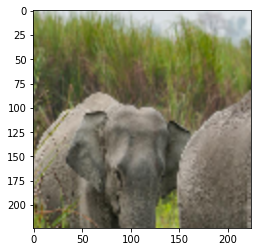

101
[('n01871265', 'tusker', 0.53258014)]


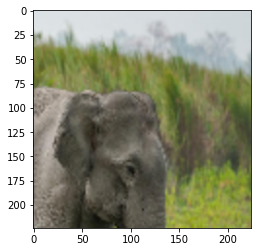

101
[('n01871265', 'tusker', 0.7576494)]


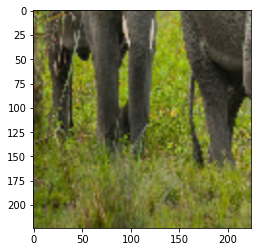

101
[('n01871265', 'tusker', 0.9282393)]


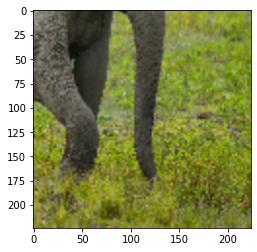

101
[('n01871265', 'tusker', 0.38148198)]


In [93]:
win = 112

for y in range(1,3):
    for x in range(1,3):
        img_half = img_arr[win*(1-y):win*y,win*(1-x):win*x]
        img_half = cv2.resize(img_half,(224,224))
        img, processed_image = process_arr(img_half)
        preds = model.predict(processed_image); print(np.argmax(preds))
        pred = decode_predictions(preds,top=1)[0]
        print(pred)

In [104]:
win = int(224/3)

for y in range(1,4):
    for x in range(1,4):
        print(win*(3-y),win*y,win*(3-x),win*x)
#         img_half = img_arr[win*(1-y):win*y,win*(1-x):win*x]
#         img_half = cv2.resize(img_half,(224,224))
#         img, processed_image = process_arr(img_half)
#         preds = model.predict(processed_image); print(np.argmax(preds))
#         pred = decode_predictions(preds,top=1)[0]
#         print(pred)

148 74 148 74
148 74 74 148
148 74 0 222
74 148 148 74
74 148 74 148
74 148 0 222
0 222 148 74
0 222 74 148
0 222 0 222


[0, 0, 74, 74]


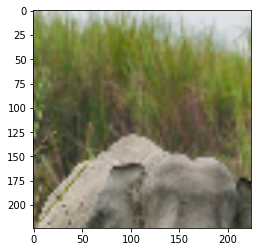

385
('n02504013', 'Indian_elephant', 0.54474807)
[74, 0, 148, 74]


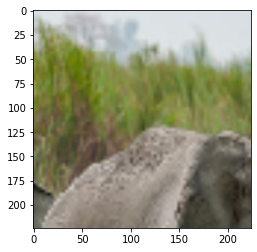

101
('n01871265', 'tusker', 0.16796151)
[148, 0, 222, 74]


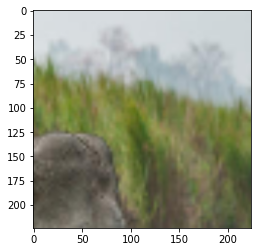

101
('n01871265', 'tusker', 0.34305814)
[0, 74, 74, 148]


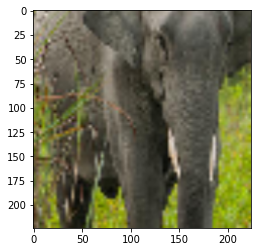

101
('n01871265', 'tusker', 0.9461405)
[74, 74, 148, 148]


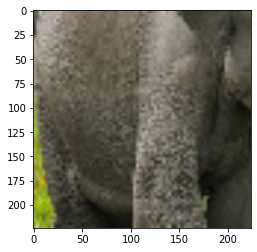

385
('n02504013', 'Indian_elephant', 0.5300448)
[148, 74, 222, 148]


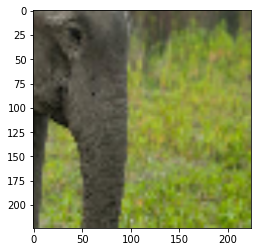

101
('n01871265', 'tusker', 0.7978011)
[0, 148, 74, 222]


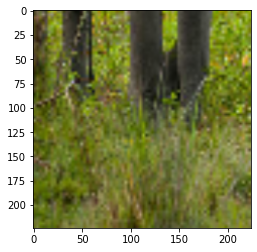

101
('n01871265', 'tusker', 0.3139632)
[74, 148, 148, 222]


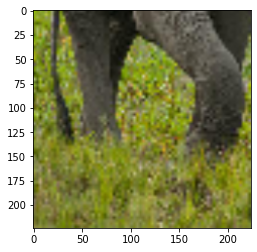

101
('n01871265', 'tusker', 0.7466139)
[148, 148, 222, 222]


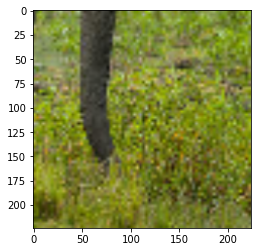

101
('n01871265', 'tusker', 0.34076202)


In [198]:
w = 3
win = int(224/w)
coords = []

for y in range(1,1+w):
    for x in range(1,1+w):
        coord = [win*(x-1),win*(y-1),win*(x),win*(y)]
        print(coord)
        img_half = img_arr[coord[1]:coord[3],coord[0]:coord[2]]
        img_half = cv2.resize(img_half,(224,224))
        img, processed_image = process_arr(img_half)
        preds = model.predict(processed_image); print(np.argmax(preds))
        pred = decode_predictions(preds,top=1)[0][0]
        print(pred)
        coords.append([coord,pred])
        

In [138]:
coords

[[[0, 0, 56, 56], ('n02093647', 'Bedlington_terrier', 0.23676926)],
 [[56, 0, 112, 56], ('n02002724', 'black_stork', 0.09633176)],
 [[112, 0, 168, 56], ('n02447366', 'badger', 0.096260086)],
 [[168, 0, 224, 56], ('n02002724', 'black_stork', 0.04410219)],
 [[0, 56, 56, 112], ('n02504013', 'Indian_elephant', 0.513535)],
 [[56, 56, 112, 112], ('n02504013', 'Indian_elephant', 0.49523446)],
 [[112, 56, 168, 112], ('n02504013', 'Indian_elephant', 0.752513)],
 [[168, 56, 224, 112], ('n03743016', 'megalith', 0.4139132)],
 [[0, 112, 56, 168], ('n01871265', 'tusker', 0.86655027)],
 [[56, 112, 112, 168], ('n01871265', 'tusker', 0.4503673)],
 [[112, 112, 168, 168], ('n01871265', 'tusker', 0.63824314)],
 [[168, 112, 224, 168], ('n02356798', 'fox_squirrel', 0.15845644)],
 [[0, 168, 56, 224], ('n01871265', 'tusker', 0.5095672)],
 [[56, 168, 112, 224], ('n01871265', 'tusker', 0.5825568)],
 [[112, 168, 168, 224], ('n02356798', 'fox_squirrel', 0.731858)],
 [[168, 168, 224, 224], ('n01871265', 'tusker', 

In [210]:
# this part crops the whole image into boxes and predicts the portion of the image where it belongs

img_draw = img_arr.copy()

font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 0.6
color = (255, 0, 0) 
thickness = 1


# it requires x,y x,y as input - and not y,y x,x - that is the input for the array
for coord in coords:
    img_draw = cv2.rectangle(img_draw,coord[0], (0,255,0), 1) 

nw = 224*3
img_draw = cv2.resize(img_draw,(nw,nw))

for coord in coords:
    org = (coord[0][0]*int(nw/224), coord[0][1]*int(nw/224)+20) 
    cv2.rectangle(img_draw,[org[0],org[1]-20,224,30], (0,255,0), -1) 
    cv2.putText(img_draw, f"{coord[1][1]} 0.{int(coord[1][2]*100)}", org, font, fontScale, color, thickness, cv2.LINE_AA) 
    
    
nw = 800
img_draw = cv2.resize(img_draw,(nw,nw))
img_draw = cv2.cvtColor(img_draw,cv2.COLOR_BGR2RGB)
cv2.imshow('test',img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('prediction.png',img_draw)
# plt.imshow(img_draw)

True

In [121]:
coords[0][0]

[0, 74, 0, 74]

In [126]:

  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(img_draw, start_point, end_point, color, thickness) 
  
# Displaying the image  
# cv2.imshow('test', image)  
cv2.imshow('test',image)
cv2.waitKey(0)
cv2.destroyAllWindows()